# Data Analyser: Analyse Historical stocks prices from Yahoo Finance

### Importing libs

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import scatter_matrix
import yfinance as yf
import os

### Config matplotlib

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(15, 15))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

### Setting start and end date

In [38]:
start = '2018-01-01'
end   = '2020-03-19'

### Settings ticker filename

In [39]:
name = 'cac40'
fileName = 'tickers/'+name+'.csv'
df = pd.read_csv(fileName)

df.head()

,label,ticker
0,Bitcoin,BTC-USD
1,Berkshire Hathaway Inc.,BRK-B
2,Amazon,AMZN
3,Accor,AC.PA
4,Air Liquide,AI.PA


### Download data

In [40]:
def get_data_to_csv_for_ticker(ticker , startDate, endDate):
    data = yf.download(ticker, start=startDate, end=endDate)
    output_file = '/{}.csv'.format(ticker)
    output_dir  = './data/{}'.format(name)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)    
    data.to_csv(output_dir+output_file)
    
df = pd.read_csv(fileName)
for index, row in df.iterrows():
    print "Getting data for "+row['label']+"("+row['ticker']+") from:"+start+" to:"+end
    print "-------------------------------------------------------------------------------------"
    get_data_to_csv_for_ticker(row['ticker'] , start, end)

Getting data for Bitcoin(BTC-USD) from:2018-01-01 to:2020-03-19
-------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
Getting data for Berkshire Hathaway Inc.(BRK-B) from:2018-01-01 to:2020-03-19
-------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
Getting data for Amazon(AMZN) from:2018-01-01 to:2020-03-19
-------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
Getting data for Accor(AC.PA) from:2018-01-01 to:2020-03-19
-------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
Getting data for Air Liquide(AI.PA) from:2018-01-01 to:2020-03-19
----------------------------------------------------

[*********************100%***********************]  1 of 1 completed
Getting data for Total(FP.PA) from:2018-01-01 to:2020-03-19
-------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
Getting data for UNIBAIL-WFD UNIBAI(URW.PA) from:2018-01-01 to:2020-03-19
-------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- URW.PA: No data found, symbol may be delisted
Getting data for Veolia Environnement(VIE.PA) from:2018-01-01 to:2020-03-19
-------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
Getting data for VINCI(DG.PA) from:2018-01-01 to:2020-03-19
-------------------------------------------------------------------------------------
[*********************100%****************

### Filter Tickers

In [41]:
tickersToKeep =[
'BTC-USD',
'BRK-B',
'AMZN',
'RI.PA',
'SAN.PA',
'SU.PA',
'OR.PA',
'ML.PA',
'BN.PA',
'MC.PA',
'FP.PA',
'AC.PA',
'SW.PA',
'AI.PA',
'KER.PA',
'FTI.PA',
'AIR.PA'
]  # ,'AIRBUS','BNP Paribas','Total'

df = df[df['ticker'].isin(tickersToKeep)]
print df.head()

                     label   ticker
0                  Bitcoin  BTC-USD
1  Berkshire Hathaway Inc.    BRK-B
2                   Amazon     AMZN
3                    Accor    AC.PA
4              Air Liquide    AI.PA


### Reading data

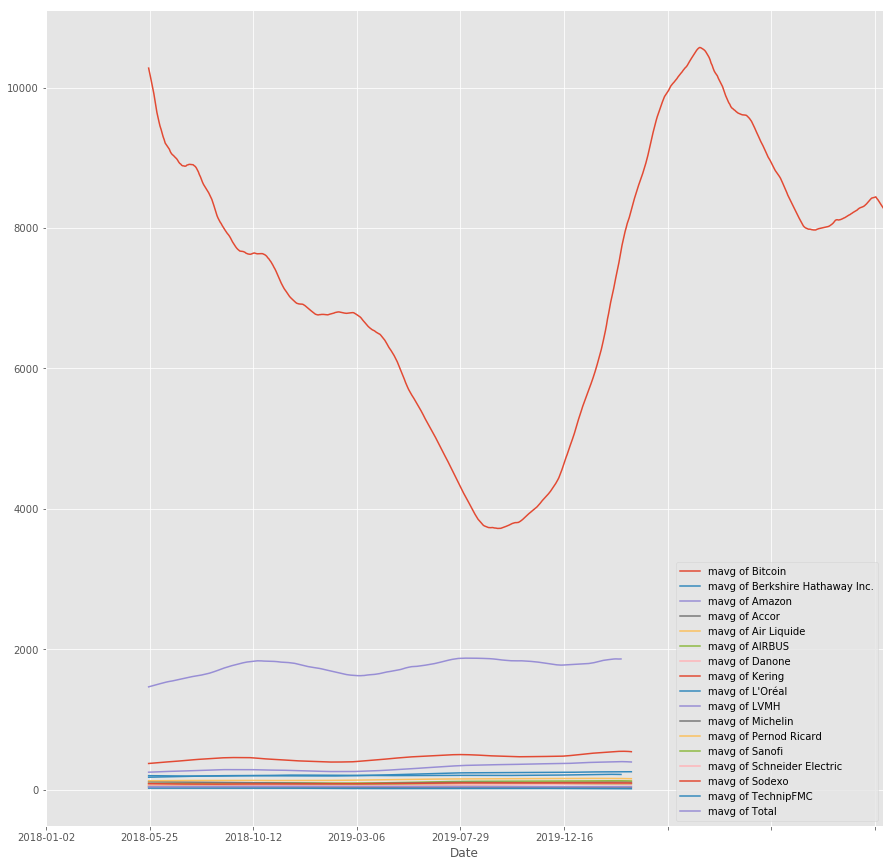

In [42]:
global_dic = {}

for index, row in df.iterrows():
    data = pd.read_csv("./data/{}/{}.csv".format(name,row['ticker'])) 
    data = data.filter(["Date","Adj Close"])
    data.set_index('Date',inplace=True)    
        
    global_dic[unicode(row['label'], "utf-8")] =data['Adj Close']
    
    ########### Plot price
    close_px = data['Adj Close']
    #close_px.plot(label=row['label'])
    
    ########### Plot Moving average
    mavg = close_px.rolling(window=100).mean()
    mavg.plot(label='mavg of '+row['label'])
    
    ########## Plot return
    rets = close_px / close_px.shift(1) - 1
    #rets.plot(label=row['label'])
    
    plt.legend()



### Analysing the data

In [43]:
global_df= pd.DataFrame.from_dict(global_dic)
retscomp = global_df.pct_change()
corr = retscomp.corr()


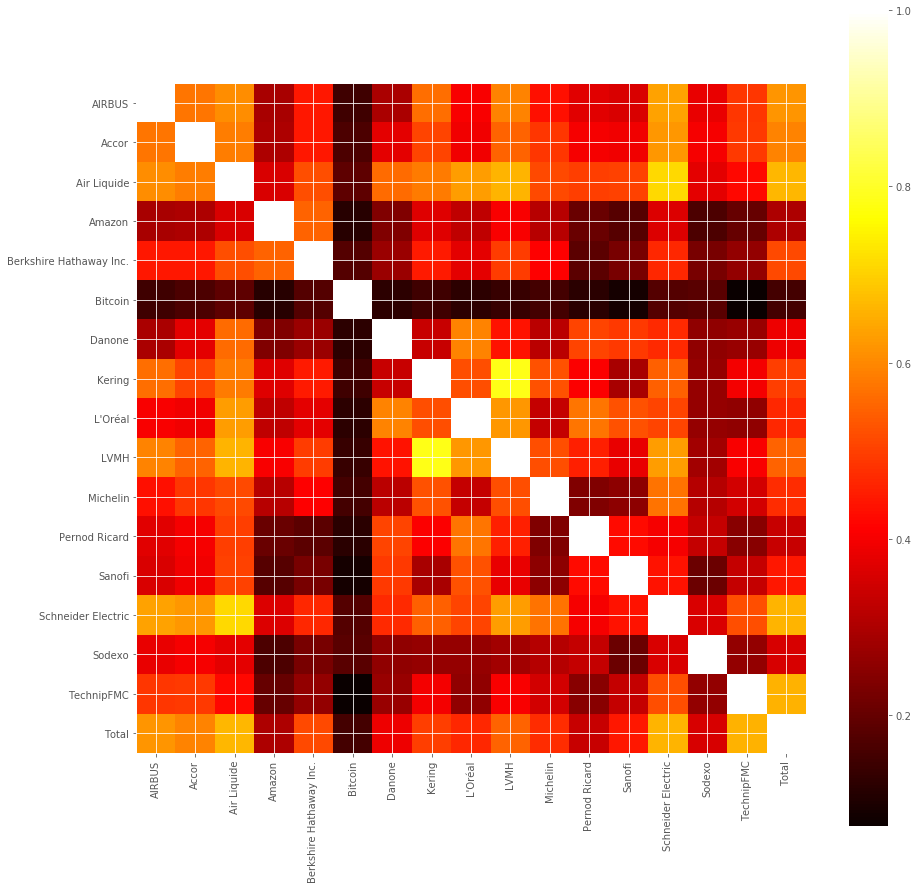

In [44]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns,rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);

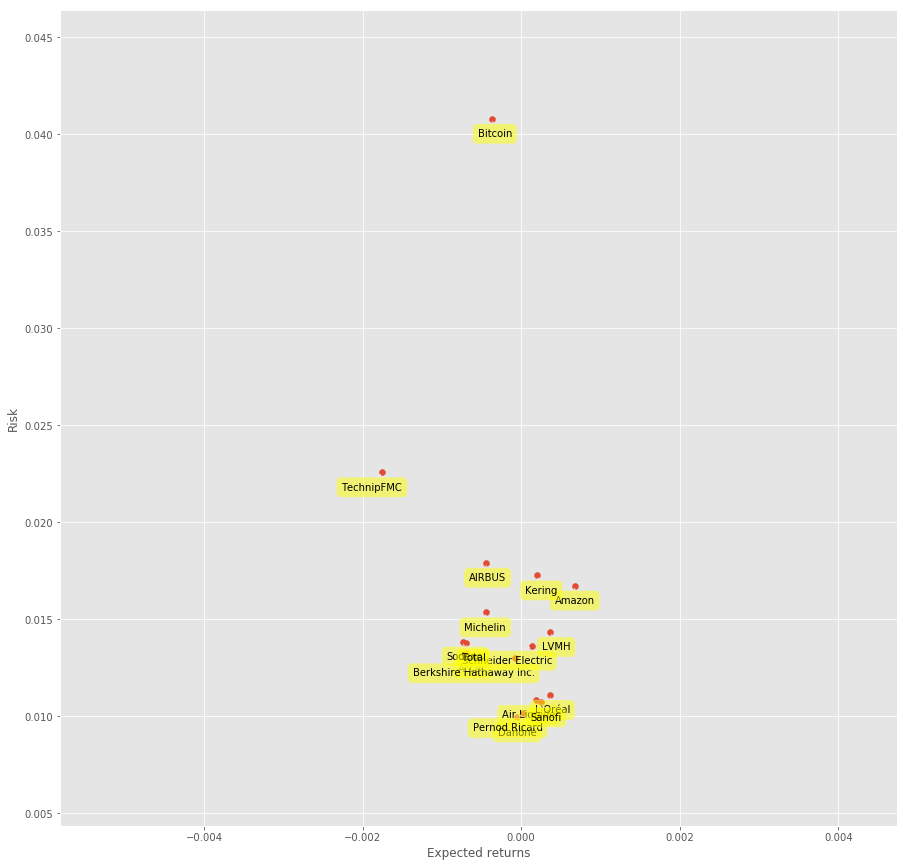

In [45]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))